In [151]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
df = pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
df = df.drop_duplicates()

In [13]:
df.describe(include= ['object'])

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [14]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


### data visualization :

In [20]:
df_counts= df['sex'].value_counts()

In [21]:
df_counts

male      675
female    662
Name: sex, dtype: int64

In [22]:
df_mean = df.groupby(['sex']).mean()

<ipython-input-22-d5b093e60167>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df.groupby(['sex']).mean()


In [24]:
df_mean

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.946667,30.943652,1.117037,13974.998864


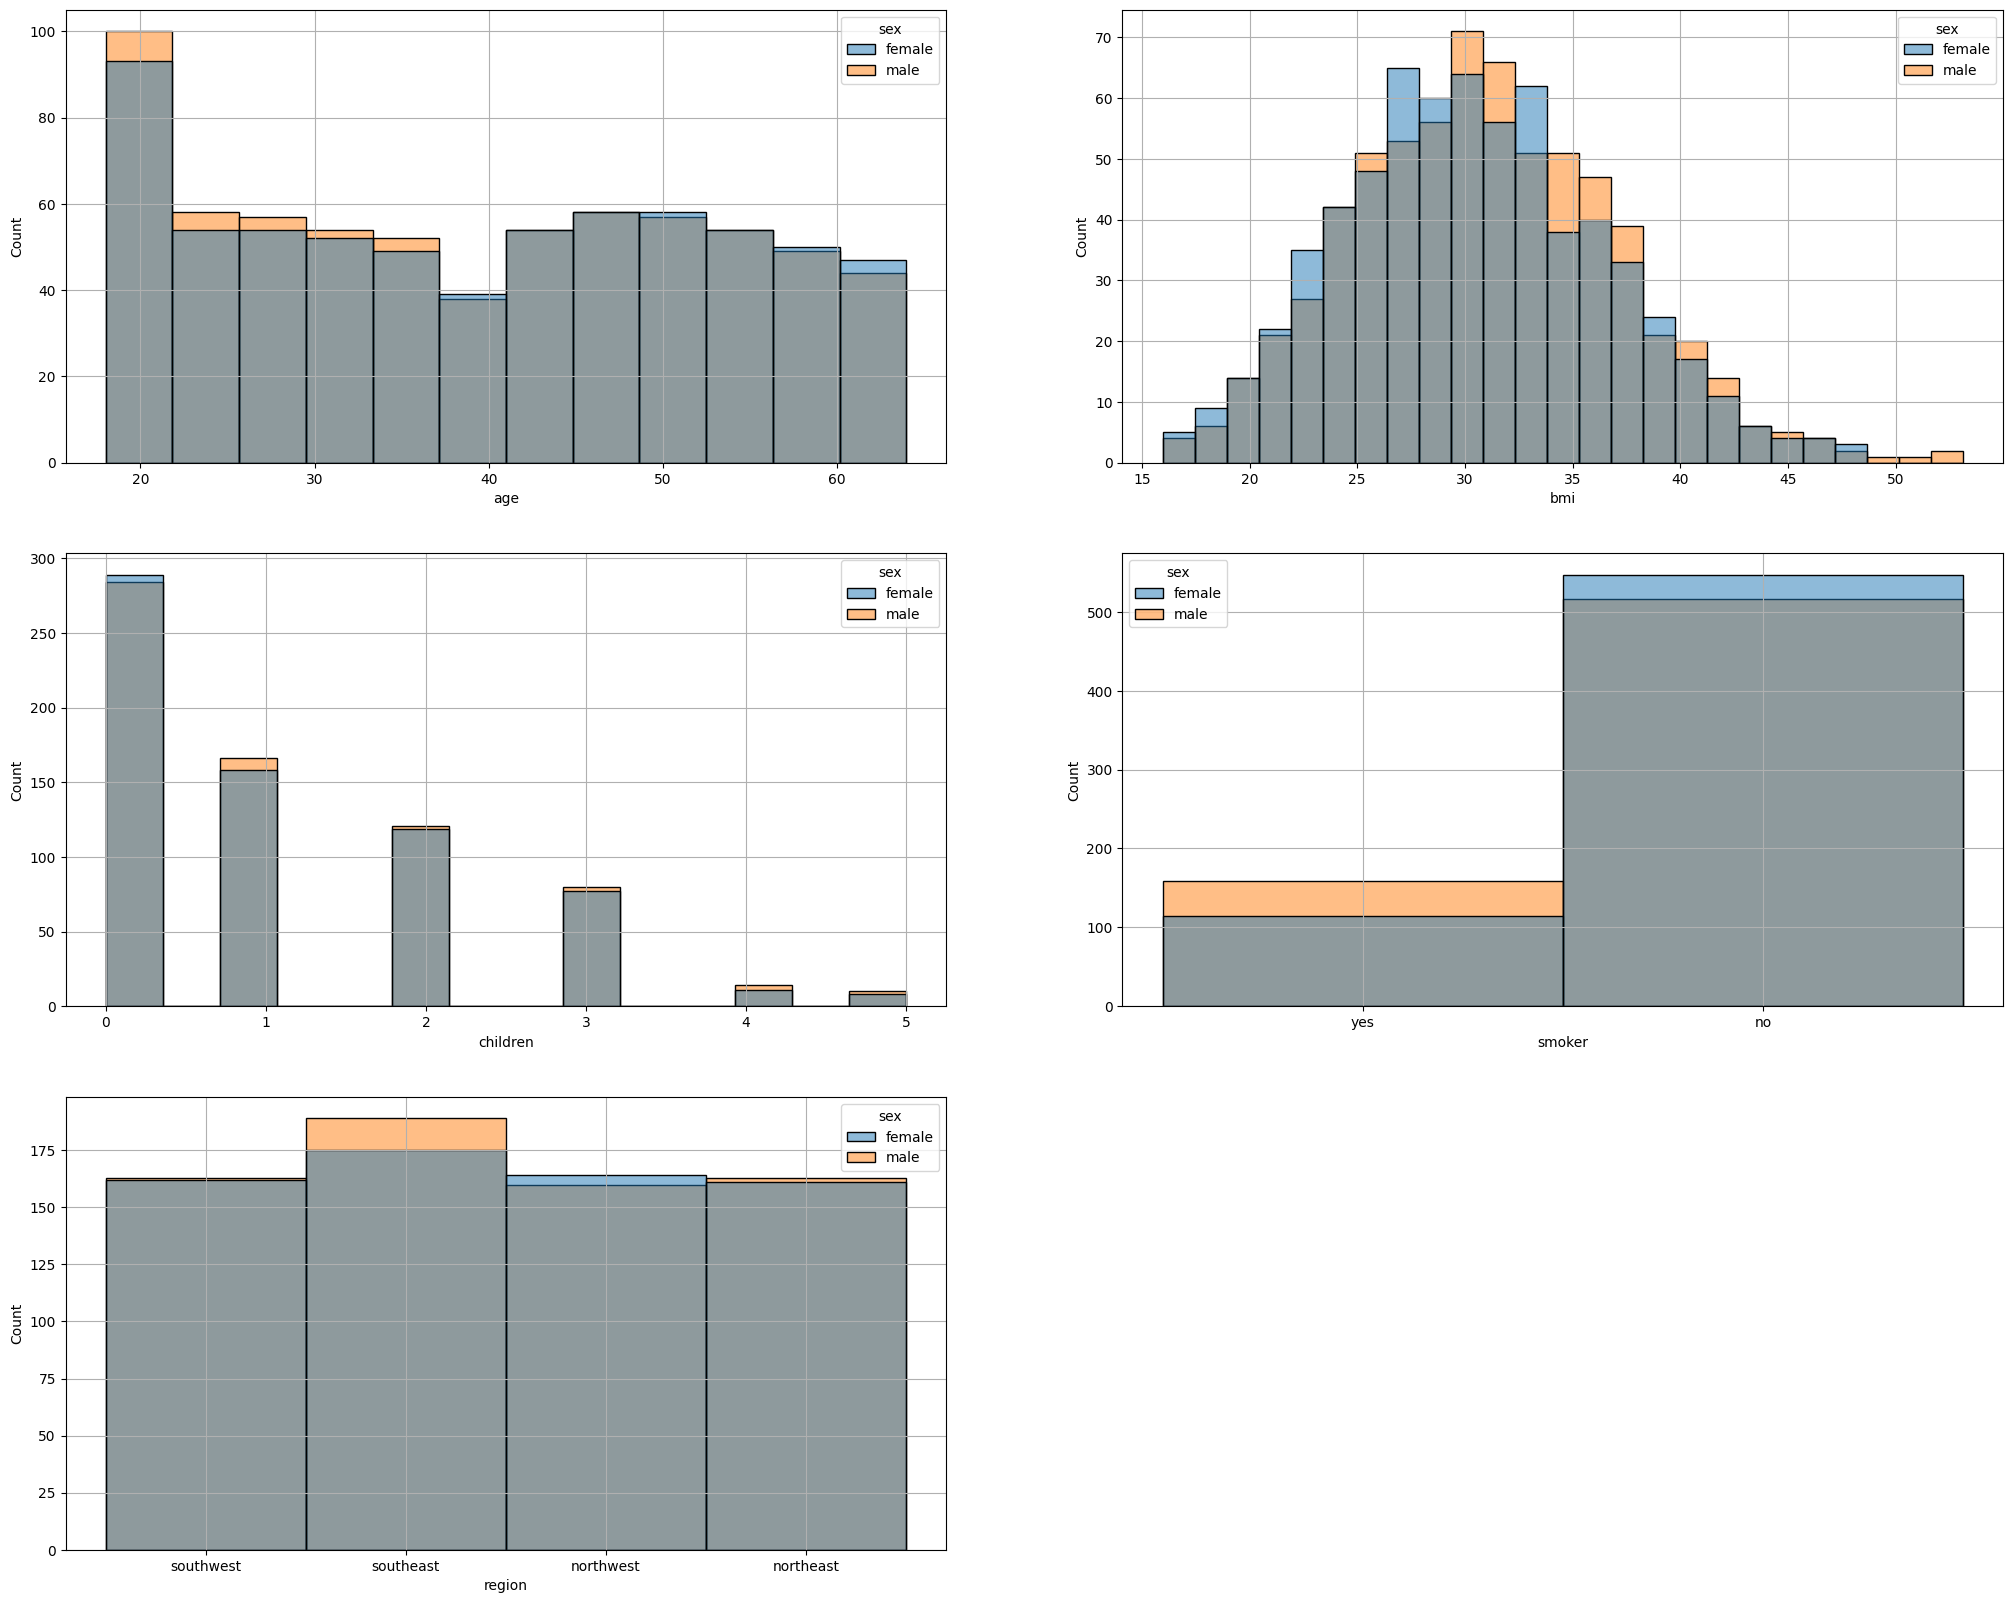

In [33]:
plt.figure(figsize= (25, 20))

features = [i for i in df.columns if i not in ['charges', 'sex']]
n = len(features)

for i, j in zip(features, range(1, n+1)):
  plt.subplot(3, 2, j)
  sns.histplot(data= df, x= i, hue= 'sex').grid(True)

plt.show()

<ipython-input-39-2229ca1d2db4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True, cmap= 'viridis')


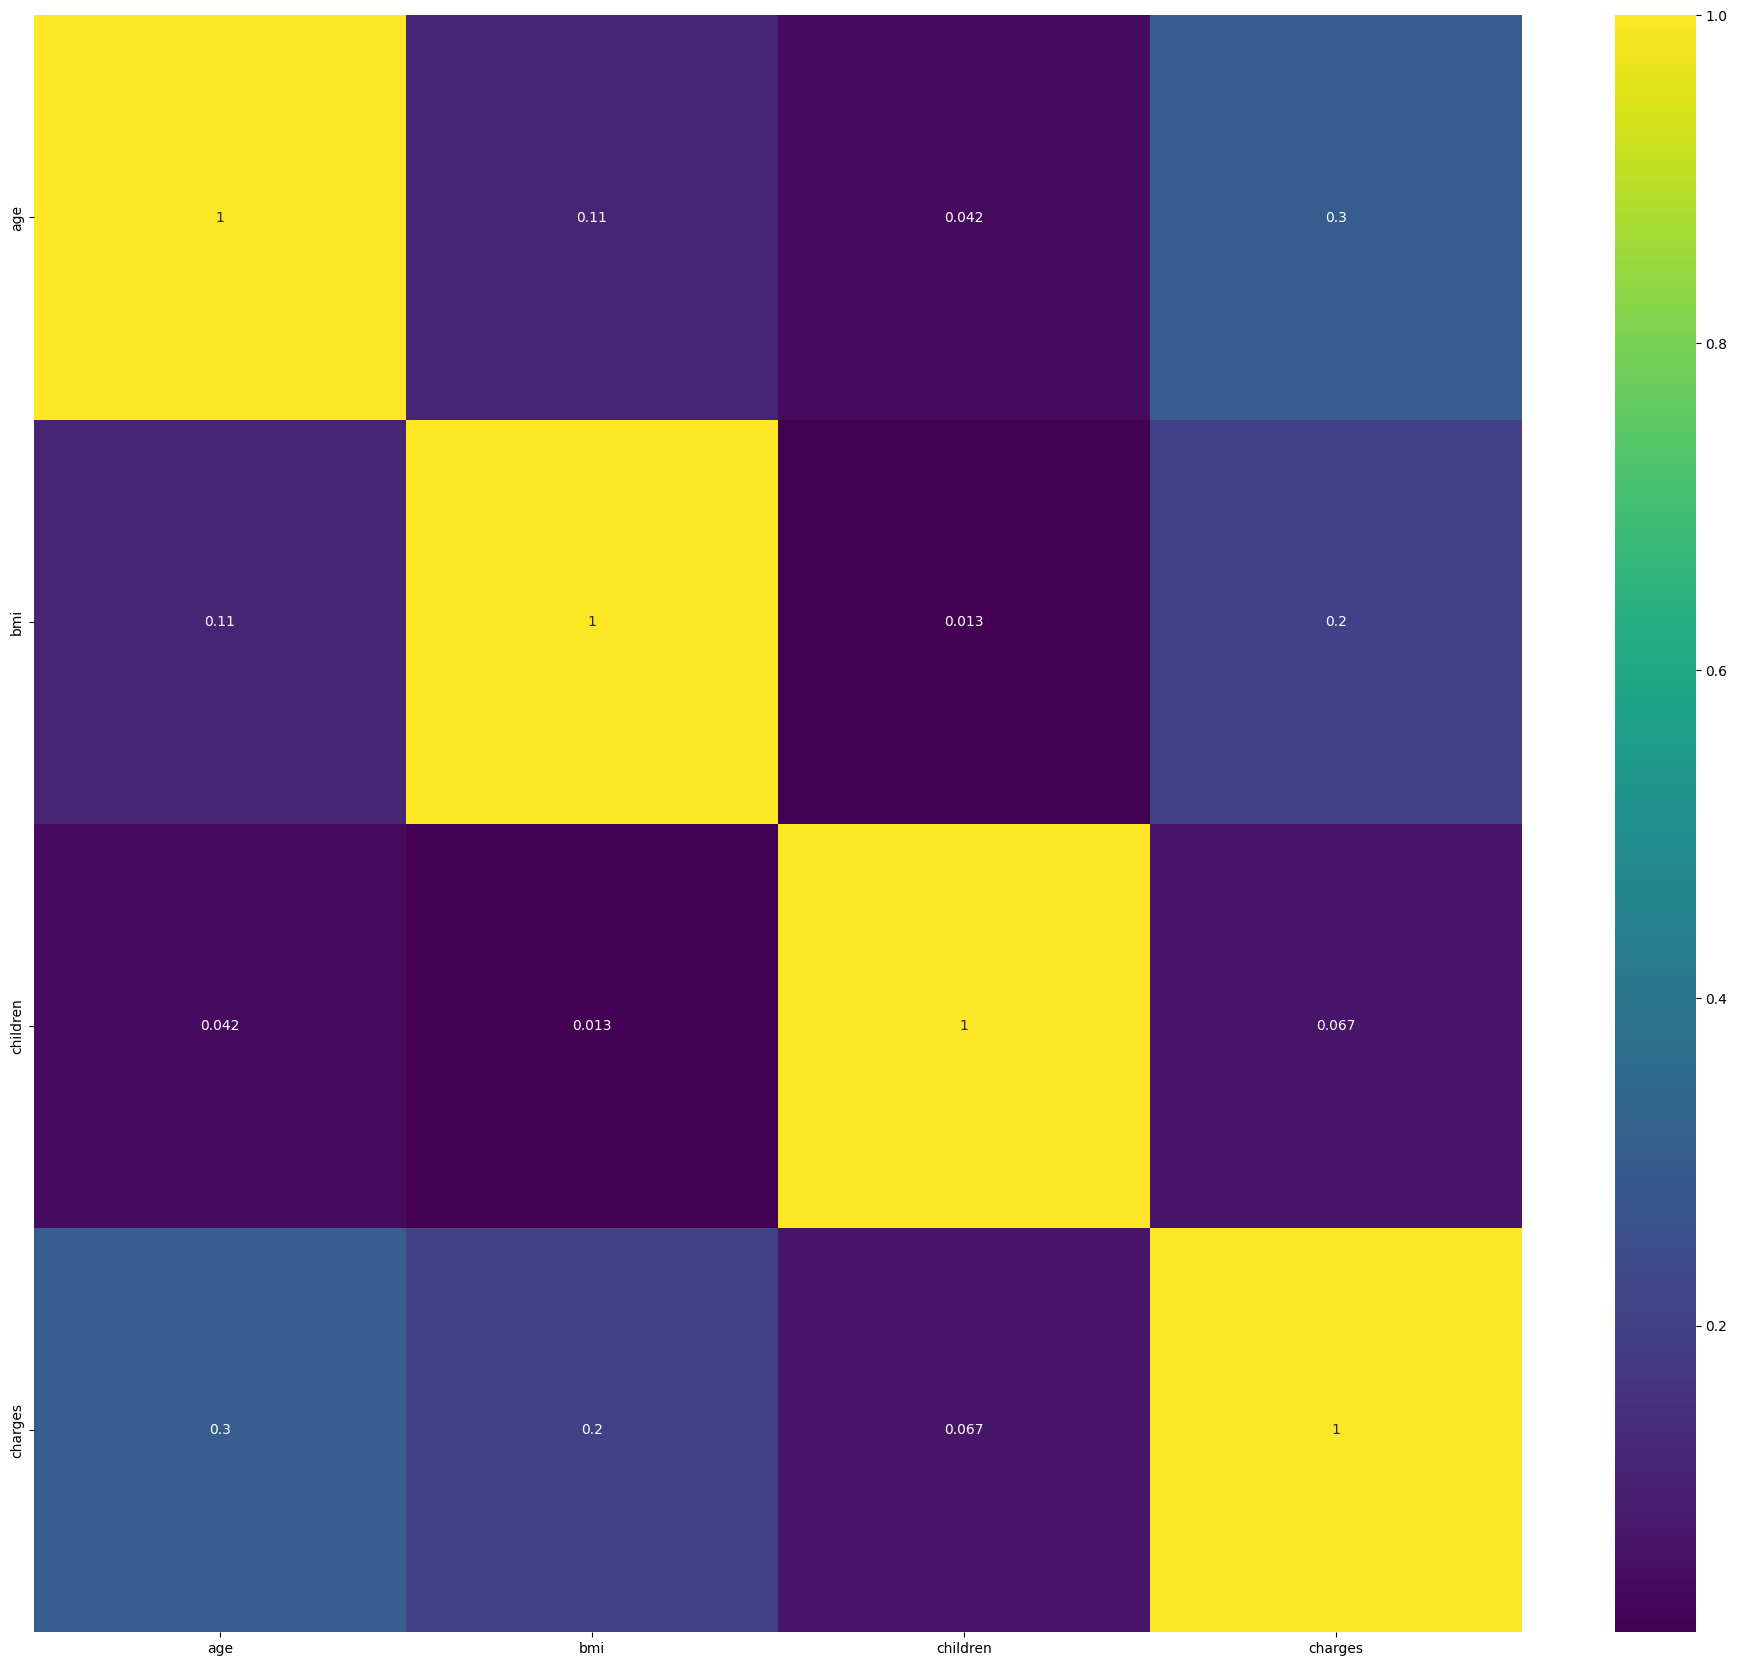

In [39]:
plt.figure(figsize= (24, 21))
sns.heatmap(df.corr(), annot= True, cmap= 'viridis')
plt.show()

In [60]:
categorical_col = [i for i in df.columns if df[i].dtypes not in ['int64', 'float64']]
numerical_col = [i for i in df.columns if i not in categorical_col]

In [61]:
categorical_col

['sex', 'smoker', 'region']

In [62]:
numerical_col

['age', 'bmi', 'children', 'charges']

In [80]:
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore').set_output(transform= "pandas")

In [81]:
sex_col = encoder.fit_transform(df[['sex']])
smoker_col = encoder.fit_transform(df[['smoker']])
region_col = encoder.fit_transform(df[['region']])

In [83]:
new_df = pd.concat([df, sex_col, smoker_col, region_col], axis = 1).drop(columns = ['sex', 'smoker', 'region'])

In [84]:
new_df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### split data

In [93]:
x = new_df[[i for i in new_df.columns if i != 'charges']]
y = new_df['charges']

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3)

In [95]:
print(f'train set shape : {(x_train.shape, y_train.shape)}')

train set shape : ((935, 11), (935,))


In [96]:
print(f'test set shape : {(x_test.shape, y_test.shape)}')

test set shape : ((402, 11), (402,))


In [97]:
x_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1257,54,27.645,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1164,41,28.310,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
801,64,35.970,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
19,30,35.300,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1044,55,35.245,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
381,55,30.685,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1037,45,30.495,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
460,49,36.630,3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
768,64,39.700,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### create models

In [110]:
def create_model(model, x_train, y_train, x_test, y_test):
  model.fit(x_train, y_train)
  prediction = model.predict(x_test)

  MSE = mean_squared_error(y_test, prediction)
  MAE = mean_absolute_error(y_test, prediction)
  RMSE = np.sqrt(MSE)
  score = model.score(x_test, y_test)

  new_tab = pd.DataFrame([[MSE, MAE, RMSE, score]], columns = ["MSE", "MAE", "RMSE", "score"])
  return new_tab

#### Linear regression

In [111]:
lr = LinearRegression()
lr_tab = create_model(lr, x_train, y_train, x_test, y_test)


In [112]:
lr_tab.index = ['LinerRegression']

In [113]:
lr_tab

,MSE,MAE,RMSE,score
LinerRegression,3.915469e+07,4224.033072,6257.370761,0.740678


#### random forest regressor

In [114]:
rfr = RandomForestRegressor()
rfr_tab = create_model(rfr, x_train, y_train, x_test, y_test)

In [116]:
rfr_tab.index = ['RandomForestRegressor']

In [117]:
rfr_tab

,MSE,MAE,RMSE,score
RandomForestRegressor,2.728319e+07,2930.692266,5223.331678,0.819303


### GradientBoostingRegressor

In [122]:
xgbr = GradientBoostingRegressor()
xgbr_tab = create_model(xgbr, x_train, y_train, x_test, y_test)

In [125]:
xgbr_tab.index = ['XGBOOST']

In [126]:
xgbr_tab

,MSE,MAE,RMSE,score
XGBOOST,2.406826e+07,2752.275611,4905.94106,0.840596


In [149]:
results = pd.concat([xgbr_tab, rfr_tab, lr_tab], ignore_index = True)
results.index = ['GradientBoostingRegressor', 'RandomForestRegressor', 'LinearRegression']

In [150]:
results

,MSE,MAE,RMSE,score
GradientBoostingRegressor,2.406826e+07,2752.275611,4905.941060,0.840596
RandomForestRegressor,2.728319e+07,2930.692266,5223.331678,0.819303
LinearRegression,3.915469e+07,4224.033072,6257.370761,0.740678



**with this results we notice that** :
   *GradientBoostingRegressor is the best model to evaluate with*
   


